In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
train_df = pd.read_csv('train.csv', index_col = 'PassengerId')
test_df = pd.read_csv('test.csv', index_col = 'PassengerId')

In [110]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [113]:
# Categorical: survived, sex, embarked, Pclass(ordinal), Sibsp, Parch
# Numerical : Age, Fare(discrete), 
# Mix types of data : ticket, cabin
# blank or null cabin>age>embarked

# transform int to categorical

In [114]:
# transform int to categorical
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [116]:
converted_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def convert(df, feature):
    for col in feature:
        df[feature] = df[feature].astype('category')
convert(train_df, converted_features)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


# Distribution of Numberical feature values across the samples

In [117]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distribution of Categorical features

In [118]:
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory Data Analysis

## 3.1 Correlating categorical features

### Taget Variable

In [119]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [120]:
train_df['Survived'].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### Sex

In [121]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


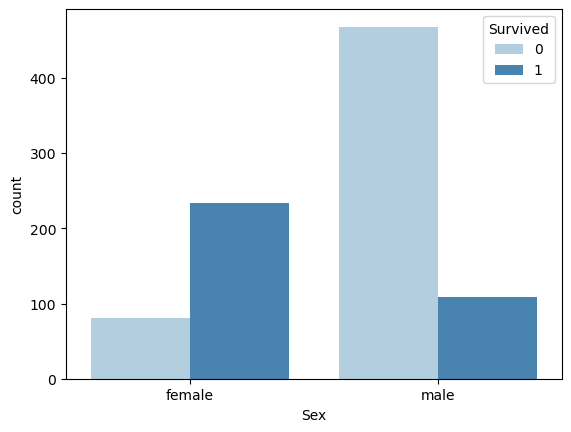

In [122]:
sns.countplot(data = train_df, x= 'Sex', hue = 'Survived', palette = 'Blues');

In [123]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

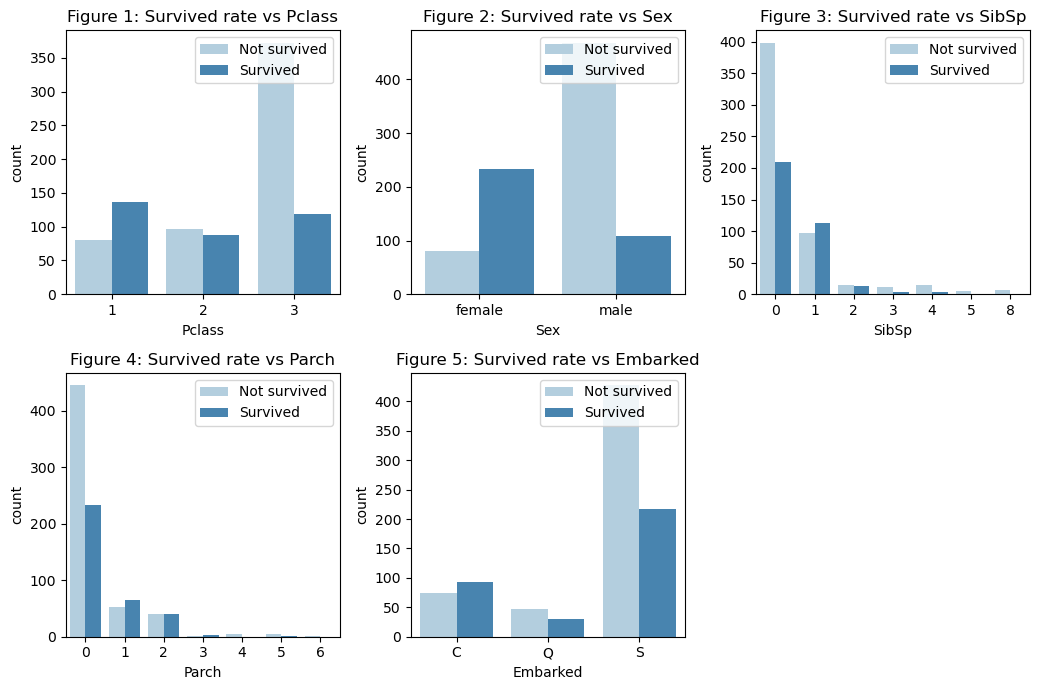

In [124]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

n_rows = 2 
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.5, n_rows * 3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):     
        i = r*n_cols + c
        if i < len(columns):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x= columns[i], hue = 'Survived', palette = 'Blues', ax = ax_i);
            ax_i.set_title(f'Figure {i+1}: Survived rate vs {columns[i]}')
            ax_i.legend(title = '', loc = 'upper right', labels = ['Not survived', 'Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
        


## 3.2 EDA for numerical Features

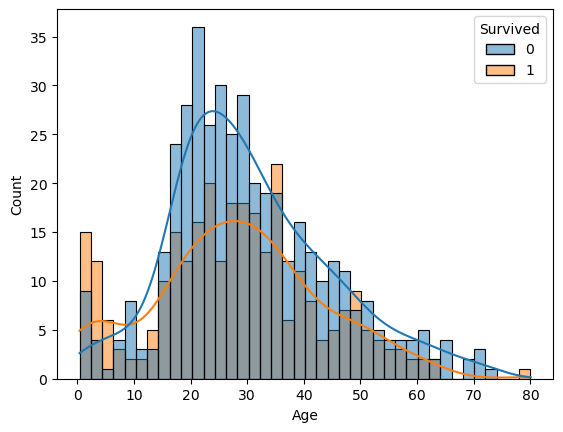

In [125]:
sns.histplot(data = train_df, x = 'Age', hue = "Survived", bins = 40, kde = True);

In [126]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

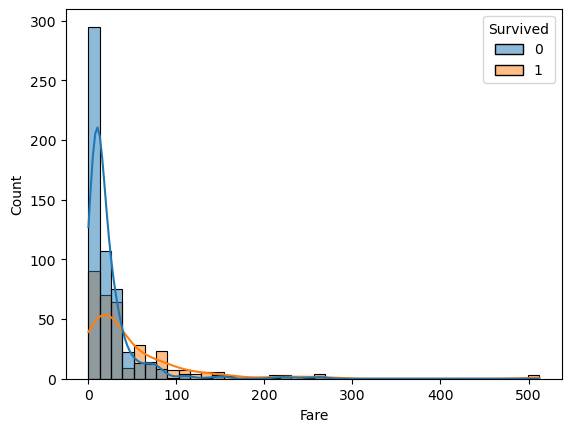

In [127]:
sns.histplot(data = train_df, x = 'Fare', hue = "Survived", bins = 40  , kde = True);

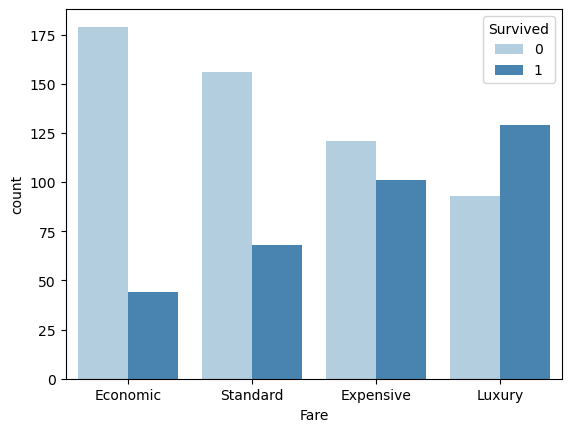

In [128]:
# to name quartile
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot(x = quartile_data, hue = train_df['Survived'], palette = 'Blues');

# 4. Feature Engineering & Data Wrangling

 ## Name (need study more)

### regular Expressing ['12 minute'](http://localhost:8888/notebooks/Desktop/titanic_kangle/TITANIC_KAGGLE.ipynb)

In [129]:

import re

def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Name'].apply(lambda name: extract_title(name))

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [130]:
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [131]:
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return  'others'
            

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))


In [132]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
others     26
Name: count, dtype: int64

In [133]:
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

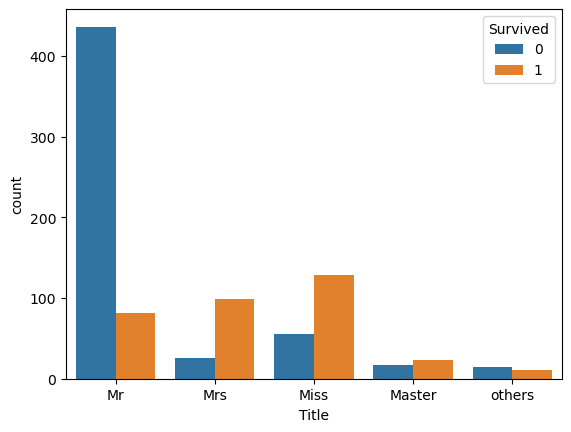

In [134]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived')

# Family

- SibSp, Parch

<Axes: xlabel='Family_Size', ylabel='count'>

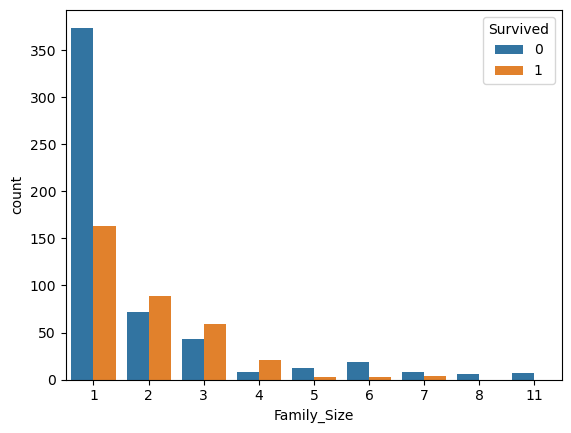

In [135]:
train_df["Family_Size"] = train_df['SibSp'].astype('int') +train_df['Parch'].astype('int') + 1
test_df["Family_Size"] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
sns.countplot(data = train_df, x = 'Family_Size', hue = 'Survived')

In [136]:
# (0,1], (1,4], (4,6], (6, 20]
pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Sole', 'Small', 'Medium', 'Large'])


PassengerId
1      Small
2      Small
3       Sole
4      Small
5       Sole
       ...  
887     Sole
888     Sole
889    Small
890     Sole
891     Sole
Name: Family_Size, Length: 891, dtype: category
Categories (4, object): ['Sole' < 'Small' < 'Medium' < 'Large']

In [137]:
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Sole', 'Small', 'Medium', 'Large'])
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Sole', 'Small', 'Medium', 'Large'])

<Axes: xlabel='Family_Cat', ylabel='count'>

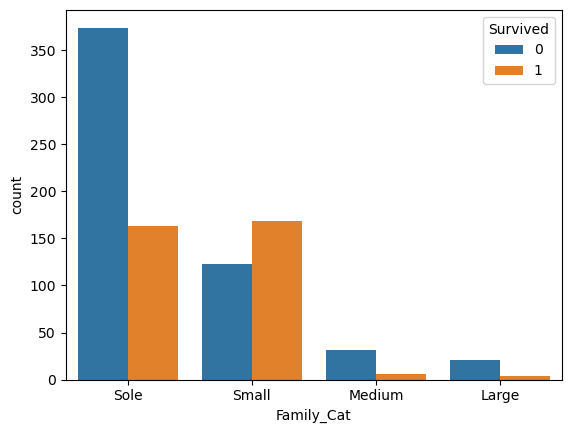

In [138]:
sns.countplot(data = train_df, x = 'Family_Cat', hue = 'Survived')

## 4.2 Data Warangling

In [139]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
feature_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']

In [140]:
# count missing data
def count_missing_data(df, cols):
    for col in cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'Column {col} has {missing_count/len(df)*100:.2f}% missing data')
count_missing_data(train_df, feature_cols)

Column Age has 19.87% missing data
Column Embarked has 0.22% missing data


In [141]:
count_missing_data(test_df, feature_cols)

Column Age has 20.57% missing data
Column Fare has 0.24% missing data


### Filling missing data

- Filling missing values with median of whole dataset

In [142]:
age_by_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()

C:\Users\admin\AppData\Local\Temp\ipykernel_13320\1134258589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()


In [143]:
age_by_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

# Filling the missing values in Age with the medians of Sex and Pclass groups

In [144]:
# train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\admin\AppData\Local\Temp\ipykernel_13320\2768827312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


Sex     Pclass  PassengerId
female  1       2              38.0
                4              35.0
                12             58.0
                32             35.0
                53             49.0
                               ... 
male    3       878            19.0
                879            25.0
                882            33.0
                885            25.0
                891            32.0
Name: Age, Length: 891, dtype: float64

In [145]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level=[0, 1], drop=True)
 

C:\Users\admin\AppData\Local\Temp\ipykernel_13320\244786859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level=[0, 1], drop=True)


In [146]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median())).reset_index(level=[0, 1], drop=True)

In [147]:
count_missing_data(train_df, feature_cols)

Column Embarked has 0.22% missing data


In [148]:
x = train_df[feature_cols]
y = train_df['Survived']
x_test = test_df[feature_cols]

In [149]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'median')), 
    ('scaler', StandardScaler())
])


cat_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy = 'most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])



In [150]:
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [151]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [152]:
x = preprocessor.transform(x)

In [153]:
x_test = preprocessor.transform(x_test)

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2 )

# Model Training

In [156]:
x_train.shape, x_val.shape

((712, 19), (179, 19))

In [157]:
x_test.shape

(418, 19)

## binary classification

In [173]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix


In [172]:
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)
log_reg.score(x_val, y_val)

0.8938547486033519

In [162]:
y_pred = log_reg.predict(x_val)
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.9047619047619048, 0.8142857142857143)

In [163]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       109
           1       0.90      0.81      0.86        70

    accuracy                           0.89       179
   macro avg       0.90      0.88      0.89       179
weighted avg       0.89      0.89      0.89       179



In [167]:
poly = PolynomialFeatures(degree =2)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.fit_transform(x_val)
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)


LogisticRegression(max_iter=1000, solver='liblinear')

In [169]:
poly_log_reg.fit(poly_features_x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [170]:
poly_log_reg.score(poly_features_x_val, y_val)

0.8715083798882681

# Decusion Tree



In [175]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)
decision_tree.fit(x_train, y_train)
decision_tree.score(x_val, y_val)

0.8268156424581006

## 5.1 Cross_validation

In [186]:
from sklearn.model_selection import cross_val_score

In [185]:
log_reg_cv = LogisticRegression(solver = 'liblinear', max_iter = 1000)
decision_tree_cv = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state = 2022)

lr_scores = cross_val_score(log_reg_cv, x, y, scoring = 'accuracy', cv = 5)
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [182]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [188]:
dt_scores =  cross_val_score(decision_tree_cv, x, y, scoring = 'accuracy', cv = 5)
dt_scores

array([0.7877095 , 0.81460674, 0.8258427 , 0.79213483, 0.81460674])

In [189]:
dt_scores.mean(), dt_scores.std()

(0.8069801016885318, 0.014586754299604428)

# 5.2 Baseline Model Comparison

[ Choosing the right estimator](https://scikit-learn.org/stable/machine_learning_map.html)